In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras


import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_excel("Folds5x2_pp.xlsx")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


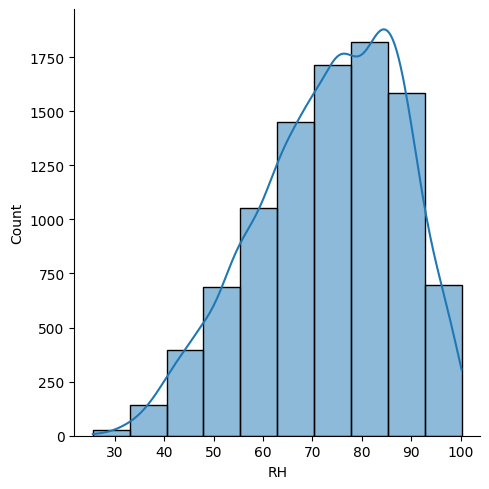

In [5]:
sns.displot(data["RH"],bins=10,kde=True)
plt.show()

In [6]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
def plot_boxplot(data,ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [8]:
def outliers(data,ft):
    Q1=data[ft].quantile(0.25)
    Q3=data[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    ls=data.index[ (data[ft] < lower_bound) | (data[ft]> upper_bound) ]

    return ls

In [9]:
index_list=[]
for feature in ['AT', 'V', 'AP', 'RH','PE']:
    index_list.extend(outliers(data,feature))
index_list

[238,
 319,
 368,
 536,
 571,
 631,
 669,
 715,
 753,
 810,
 847,
 983,
 1091,
 1250,
 1290,
 1388,
 1583,
 1660,
 1808,
 2003,
 2060,
 2298,
 2372,
 2395,
 2447,
 2481,
 2579,
 2761,
 2972,
 2977,
 2989,
 3015,
 3021,
 3066,
 3213,
 3412,
 3443,
 3483,
 3492,
 3766,
 3796,
 3955,
 4067,
 4125,
 4202,
 4327,
 4697,
 4793,
 4928,
 5006,
 5067,
 5431,
 5529,
 5690,
 5706,
 5805,
 5840,
 5863,
 5928,
 5956,
 6006,
 6346,
 6581,
 6708,
 6789,
 6829,
 6925,
 7077,
 7186,
 7320,
 7485,
 7623,
 7807,
 7892,
 8098,
 8104,
 8133,
 8270,
 8379,
 8411,
 8462,
 8568,
 9060,
 9068,
 9159,
 9267,
 9342,
 9366,
 789,
 2262,
 3603,
 4367,
 6472,
 7983,
 8061,
 8737,
 8751,
 9015,
 9074,
 9075]

In [10]:
def remove(data,ls):
    ls=sorted(set(ls))
    data=data.drop(ls)
    return data

In [11]:
data_cleaned=remove(data,index_list)

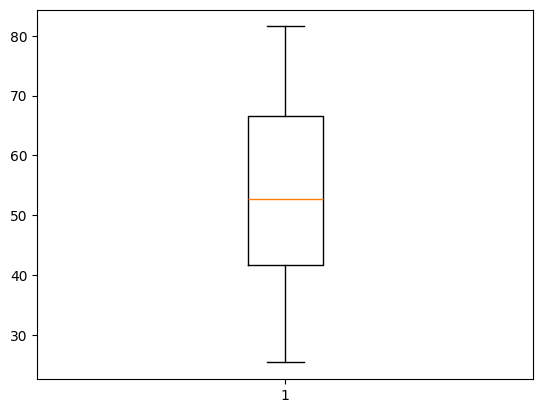

In [12]:
plt.boxplot(data_cleaned["V"])
plt.show()

In [13]:
data_cleaned

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [14]:
data_cleaned.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

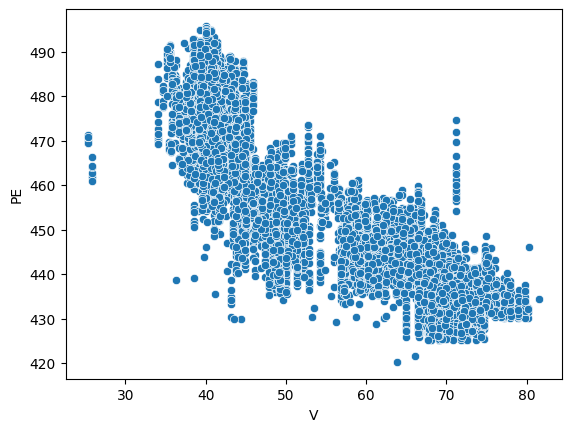

In [15]:
sns.scatterplot(x=data["V"],y=data["PE"])
plt.show()

In [16]:
from scipy.stats import boxcox
data_cleaned["RH"],a=boxcox(data_cleaned["RH"])

In [18]:
data_cleaned.skew()

AT   -0.152640
V     0.182933
AP    0.167724
RH   -0.106806
PE    0.324855
dtype: float64

In [19]:
X=data_cleaned.drop("PE",axis=1)
y=data_cleaned["PE"]

In [20]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
print("Intercept:",model1.intercept_)
print("coefficients:",model1.coef_)

train_predictions=model1.predict(X_train)
test_predictions=model1.predict(X_test)

print("Train R2:",model1.score(X_train,y_train))
print("Test R2:",model1.score(X_test,y_test))
print("cross validation score:",cross_val_score(model1,X,y,cv=5).mean())

Intercept: 436.7052288292302
coefficients: [-1.95629323 -0.23707398  0.07474746 -0.00608334]
Train R2: 0.9276979114013604
Test R2: 0.9278477390098854
cross validation score: 0.9275885352958266


In [21]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=data_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        04:00:12   Log-Likelihood:                -27836.
No. Observations:                9468   AIC:                         5.568e+04
Df Residuals:                    9463   BIC:                         5.572e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    438.4311     10.205     42.963      0.000     418.427     458.435
X[0]          -1.9666      0.015   -127.969      0.000      -1.997      -1.937
X[1]          -0.2375      0.007    -32.485      0.000      -0.252      -0.223
X[2]           0.0734      0.010      7.382      0.000       0.054       0.093
X[3]          -0.0062      0.000    -37.071      0.000      -0.007      -0.006
==============================================================================
Omnibus:                      874.226   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3988.266
Skew:                          -0.348   Prob(JB):                         0.00
Kurtosis:                       6.102   Cond. No.                     3.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter=PolynomialFeatures(degree=2)
X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

ypred_train=model.predict(X_train_poly)

from sklearn.metrics import mean_squared_error,r2_score
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())


Train RMSE: 4.24587628651654
Train R2: 0.9381237949561382
Cross Validation Score: 0.9375466236630927


In [24]:
X_test_poly=pd.DataFrame(polynomial_converter.transform(X_test))

ypred_test=model.predict(X_test_poly)

print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2:",r2_score(y_test,ypred_test))

Test RMSE: 4.321399541801472
Test R2: 0.9343329400296803


In [25]:
train_r2=[]
test_r2=[]

for i in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=i)
    X_train_poly=pd.DataFrame(polynomial_converter.fit_transform(X_train))

    model=LinearRegression()
    model.fit(X_train_poly,y_train)

    train_pred=model.predict(X_train_poly)
    train_r2.append(model.score(X_train_poly,y_train))

    X_test_poly=pd.DataFrame(polynomial_converter.transform(X_test))

    test_pred=model.predict(X_test_poly)
    test_r2.append(model.score(X_test_poly,y_test))

In [26]:
train_r2

[0.928952227247553,
 0.9381237949561382,
 0.941164695698252,
 0.942190403536202,
 0.9425993855643144,
 0.9409028190801894,
 0.9448328422086123,
 0.9468610262311842,
 0.947283704991025]

In [27]:
test_r2

[0.9227325441253845,
 0.9343329400296803,
 0.9367626873131255,
 0.9364640386588744,
 0.933768653563382,
 0.9332972405042199,
 0.9365453546153016,
 0.9391550014605903,
 0.9392197173839469]

In [28]:

final_poly_converter=PolynomialFeatures(degree=6)
X_train_poly=pd.DataFrame(final_poly_converter.fit_transform(X_train))

final_model=LinearRegression()
final_model.fit(X_train_poly,y_train)

train_pred=final_model.predict(X_train_poly)
print("train R2:",final_model.score(X_train_poly,y_train))
print("Cross validation score:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())

X_test_poly=pd.DataFrame(final_poly_converter.transform(X_test))
test_pred=final_model.predict(X_test_poly)
print("test R2:",final_model.score(X_test_poly,y_test))

train R2: 0.9409028190801894
Cross validation score: 0.937934449909988
test R2: 0.9332972405042199


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [30]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
estimator=Lasso()
param_grid={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [31]:
from sklearn.linear_model import Lasso
lasso_best=Lasso(alpha=1)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coefficients:",lasso_best.coef_)

ypred_train=lasso_best.predict(X_train)
from sklearn.metrics import r2_score
print("train r2:",r2_score(y_train,ypred_train))
from sklearn.model_selection import cross_val_score
print("Cv score:",cross_val_score(lasso_best,X_train,y_train,cv=5).mean())

ypred_test=lasso_best.predict(X_test)
print("test r2:",r2_score(y_test,ypred_test))


Intercept: 456.74671067432547
coefficients: [-1.91845401 -0.25046868  0.05461083 -0.00577398]
train r2: 0.9275422159120942
Cv score: 0.9273941287022573
test r2: 0.9273811608724862


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
estimator=Ridge()

param_grid={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 4}

In [33]:
ridge_best=Ridge(alpha=2)
ridge_best.fit(X_train,y_train)

print("intercept:",ridge_best.intercept_)
print("coefficients:",ridge_best.coef_)

ypred_train=ridge_best.predict(X_train)
print("train r2:",r2_score(y_train,ypred_train))
print("cv Score:",cross_val_score(ridge_best,X_train,y_train,cv=5).mean())

ypred_test=ridge_best.predict(X_test)
print("test r2:",r2_score(y_test,ypred_test))

intercept: 442.00127461036004
coefficients: [-1.96511464 -0.23981855  0.06999365 -0.00624885]
train r2: 0.9285816243394698
cv Score: 0.9283992869392887
test r2: 0.9243714421936571


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

from sklearn.linear_model import ElasticNet
enr_base=ElasticNet()
enr_base.fit(X_train,y_train)

train_predictions=enr_base.predict(X_train)
test_predictions=enr_base.predict(X_test)

print("train R2:",enr_base.score(X_train,y_train))
print("test R2:",enr_base.score(X_test,y_test))
from sklearn.model_selection import cross_val_score
print("cross Validation Score:",cross_val_score(enr_base,X,y,cv=5).mean())

train R2: 0.9272684334523723
test R2: 0.9269556230625974
cross Validation Score: 0.9271672601717356


In [35]:
from sklearn.model_selection import GridSearchCV

estimator=ElasticNet()

param_grid={"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0.1,0.5,0.75,0.9,0.95,1]}

model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [36]:
enr_best=ElasticNet(alpha=0.1,l1_ratio=1)
enr_best.fit(X_train,y_train)

print("intercept:",enr_best.intercept_)
print("coefficients",enr_best.coef_)

train_predictions=enr_best.predict(X_train)
test_predictions=enr_best.predict(X_test)

print("Train R2:",enr_best.score(X_train,y_train))
print("test R2:",enr_best.score(X_test,y_test))
print("cross validation score:",cross_val_score(enr_best,X,y,cv=5).mean())

intercept: 438.90772811079887
coefficients [-1.95318783 -0.23817582  0.07254352 -0.00605703]
Train R2: 0.927696514313808
test R2: 0.9278176342139063
cross validation score: 0.9275873685621623


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
def ann_model_regressor():
    
    model=Sequential()

    model.add(Dense(input_dim=4,units=6,activation="relu",kernel_initializer="uniform"))

    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform"))

    model.add(Dense(units=1,activation="relu",kernel_intitializer="uniform"))

    model.compile(optimizer="adam",loss="mean_squared_error")

    return model

In [19]:
def ann_model_regressor():
    model=Sequential()
    model.add(Dense(input_dim=4,units=6,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=6,activation="relu",kernel_initializer="uniform"))
    model.add(Dense(units=1,activation="relu",kernel_initializer="uniform"))
    model.compile(optimizer="adam",loss="mean_squared_error")
    return model

In [20]:
ann=ann_model_regressor()

In [21]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206380.1094
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 198739.8125
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164874.4219
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 106518.2109
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56124.8477
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31829.5000
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21446.0664
Epoch 8/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16382.4170
Epoch 9/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 12851.0830
Epoch 10/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 9353.5986
Epoch 11/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6530.5879
Epoch 12/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4217.5234
Epoch 13/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2572.2961
Epoch 14/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [22]:
ypred_train=ann.predict(X_train)
ypred_test=ann.predict(X_test)

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


In [23]:
from sklearn.metrics import mean_squared_error
print("MSE for train data:",mean_squared_error(y_train,ypred_train))
print("MSE for test data:",mean_squared_error(y_test,ypred_test))

MSE for train data: 20.926183485497674
MSE for test data: 22.33889835795676


In [24]:
from sklearn.metrics import r2_score
print("R2 for train data ",r2_score(y_train,ypred_train))
print("R2 for test data: ",r2_score(y_test,ypred_test))

R2 for train data  0.9277975591743232
R2 for test data:  0.9231078425789715
